In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# Generate synthetic sequential data
def generate_data(n_samples=1000, seq_length=10):
    X = np.random.rand(n_samples, seq_length, 1)  # Random sequences
    y = np.mean(X, axis=1)  # Target is the average of the sequence
    return X, y

# Generate data
X_train, y_train = generate_data()
X_test, y_test = generate_data(n_samples=200)

# Build GRU model
model = Sequential([
    GRU(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Mean Absolute Error: {test_mae:.4f}")


Epoch 1/20


C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 - 2s - 54ms/step - loss: 0.0524 - mae: 0.1815 - val_loss: 0.0089 - val_mae: 0.0777
Epoch 2/20
32/32 - 0s - 4ms/step - loss: 0.0043 - mae: 0.0521 - val_loss: 0.0038 - val_mae: 0.0498
Epoch 3/20
32/32 - 0s - 4ms/step - loss: 0.0031 - mae: 0.0442 - val_loss: 0.0032 - val_mae: 0.0460
Epoch 4/20
32/32 - 0s - 4ms/step - loss: 0.0027 - mae: 0.0412 - val_loss: 0.0028 - val_mae: 0.0430
Epoch 5/20
32/32 - 0s - 4ms/step - loss: 0.0024 - mae: 0.0386 - val_loss: 0.0024 - val_mae: 0.0397
Epoch 6/20
32/32 - 0s - 4ms/step - loss: 0.0020 - mae: 0.0359 - val_loss: 0.0020 - val_mae: 0.0361
Epoch 7/20
32/32 - 0s - 4ms/step - loss: 0.0017 - mae: 0.0327 - val_loss: 0.0016 - val_mae: 0.0327
Epoch 8/20
32/32 - 0s - 4ms/step - loss: 0.0013 - mae: 0.0292 - val_loss: 0.0012 - val_mae: 0.0276
Epoch 9/20
32/32 - 0s - 4ms/step - loss: 9.4440e-04 - mae: 0.0243 - val_loss: 7.6471e-04 - val_mae: 0.0218
Epoch 10/20
32/32 - 0s - 4ms/step - loss: 6.0698e-04 - mae: 0.0197 - val_loss: 4.5183e-04 - val_mae: 0.0171
Epo

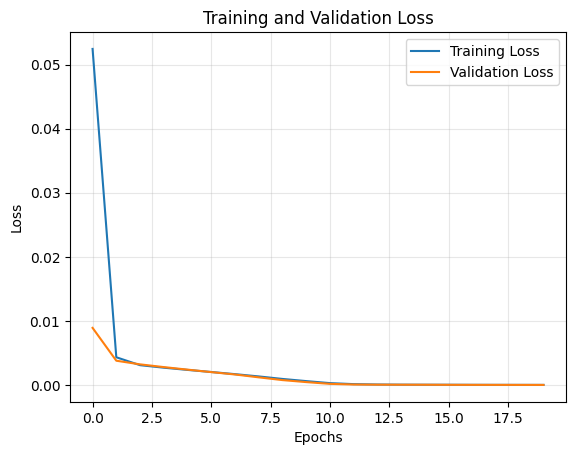

In [2]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
